# Solving Optimization using PuLP (Linear programming)

#### Problem statement


Company ABC produces 3 items (A , B and C for instance) from two raw material lets say mat1 and mat2. Find below the raw material Mix to create items A, B and C below with Raw material's availabilities - 

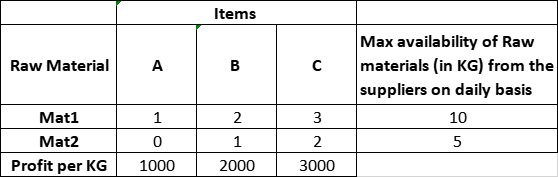

#### Ojbective - 
ABC wants to determine the best (optimal) material mix of items A, B and C that maximizes the total daily profit. 

#### <center> Mathematical Formulation
#### Decision Variables - 
x1 - Item A daily produce in kg <br>
x2 - Item B daily produce in kg <br>
x3 - Item C daily produce in kg <br>

#### Objective function: Maximize (1000*x1 + 2000*x2 + 3000*x3) </center>


##### Subject to: 
x1 + 2*x2 + 3*x3 <=10 <br>
2*x2 + 3*x3 <=5<br>
x1,x2,x3>=0

#### Solution - 
Python interface for optimization - Use PuLP (for linear programming models) to create decision variables and formulate the problem statement <br>
Popular optimization solvers - CPLEX, Gurobi, GLPK, LINDO and Lingo etc.

In [1]:
# ! pip install pulp

In [2]:
from pulp import *

In [3]:
# create a list of items
items = ['A', 'B', 'C']

In [4]:
# A dictionary of items and profits / kg 
profit = {
    'A':1000,
    'B':2000,
    'C':3000,
}

In [5]:
# A dictionary regarding the items compositions with raw materials
rm_mat1 = {
    'A':1,
    'B':2,
    'C':3,
}

rm_mat2 = {
    'A':0,
    'B':1,
    'C':2,
}

In [6]:
# initialize the problem variable 
prb = LpProblem('maximize_profit',LpMaximize)

In [7]:
item_vars = LpVariable.dicts('items',items,0);item_vars

{'A': items_A, 'B': items_B, 'C': items_C}

In [8]:
# Adding the objective function to the problem variable - total profit by producing items A,B and C
prb += lpSum(profit[i]*item_vars[i] for i in items)

In [9]:
# Adding constraints to the problem
prb += lpSum([rm_mat1[i]*item_vars[i] for i in items]) <=10
prb += lpSum([rm_mat2[i]*item_vars[i] for i in items]) <=5

In [10]:
# lets write the problem data into lp file 
prb.writeLP('maximize_profit.lp')

[items_A, items_B, items_C]

In [11]:
# lets solve this problem using PuLP solver
prb.solve()

1

In [12]:
print(f'Status: {LpStatus[prb.status]}')
# optimal values per items
for i in prb.variables():
    print(f'{i.name} : {i.varValue} k.g.')
# Maximum profit
print(f'Maximum daily profit {value(prb.objective)}')

Status: Optimal
items_A : 2.5 k.g.
items_B : 0.0 k.g.
items_C : 2.5 k.g.
Maximum daily profit 10000.0


##### Due to scalability of this model, we can add more decision variables, constraints etc. 1000's of them and can be generalized to any type of linear programming problems. 